<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [221]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

# Time related functions.
import time

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# Command to connect to google drive and read dataset .The .csv file data is read using pandas library into a dataframe named data.
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/MyLearning/Churn.csv")

Mounted at /content/drive


In [3]:
#Lets take a copy of the data
ds = data.copy()

## Data Overview

In [4]:
#Read the data and check the if the dataset is loaded correctly
# head() function returns the first 5 rows
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Lets read the last 5 rows
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
#Get total number of records(rows and columns) in the dataframe by checking the shape
ds.shape

(10000, 14)

Observations

Data has been loaded into the dataframe

*   There are 14 columns of data available in the loaded dataframe.
*   There are 10,000 rows and 14 columns in the loaded dataframe.
Data contains customer unique ids and geographic information with Age/Gender/Credit score and estimated salary. Data  includes the customer account balance and no of products purchased with bank with their activity status. The Exited column indicating if the customer's current status with the bank along with all the other data columns will be helpful in analysing if the customer would leave the bank in next 6 months or not.





**Check the data types of the columns for the dataset**

In [7]:
#Get the dataset info for datatypes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#Lets use this dataset to print columns based on data types
data_type_grouped = ds.columns.to_series().groupby(data.dtypes).groups
print(data_type_grouped)

{int64: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], float64: ['Balance', 'EstimatedSalary'], object: ['Surname', 'Geography', 'Gender']}


In [9]:
#check if there are any null values across each column using isnull() on every row and sum the total null records

ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observations**

*   There are around 14 columns in total, out of which 9 columns are of type integers , 2 columns are of type  float  and 3 columns are of type object.
*   All the columns have 10,000 records and there are no null values observed in any columns.






In [8]:
#Check if there are any duplicates
ds.duplicated().sum()

0

Observation

*   There are NO null values in any columns.
*   There are NO duplicates in data.



### **Summary of the dataset**###

In [10]:
#Statisticaly summary of numerical columns
ds.describe(exclude=["object"]).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Observation on numerical columns**



*   RowNumber and CustomerID are unique identifiers for each of the row & customer id.
*   There are customers with a min credit score of 350 and max score of 850. About 75% have a score of about 718. The mean credit score is ~650 and median is about 652. Mean and median does not seem to have much of a variance.
*   There are customers with a min age of 18 and max age of 92.About 75% have an age of 44. The mean age is 38 and median is about 37. Mean and median does not seem to have much of a variance.
*   There are customers who have been with the bank with a max tenure of 10 years.There are customers with a min tenure year of 0 probably indicating that they are new customers who are yet to complete a year with the bank.About 75% have been with the bank for about 7 years. Mean tenure years is about 5 and median is also about 5.Mean and median does not seem to have much of a variance.
*   There are customers with a max balance of 2,50,898.09 and min balance of 0.About 75% have a balance of about ~ 1,27,000 . Mean balance is about ~7,64,000 and median is about 9,71,000.There is some variance between mean & median.
*   Most of the customers have minimum 1 product and a maximum of 4.About 75% have about 2 products. Mean number of products is ~2 and median is about 1.
*   There are customers with and without credit cards.About 75% have credit cards.
*   There are customers who are active/inactive. About 75% are active.


*   There are customers with a min salary of 11.58 and max salary of about ~1,99,992.About 75% have a salary of about 1,49,388. Mean salary is about 1,00,090 and median is about 1,49,388.
*   Most of the customers are still with the bank. About 75% is still with the bank (exited flag= 0) . But there are few cutomers who have exited(exited flag =1).







In [11]:
#Statisticaly summary of categorical columns
ds.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Observations**


*   There are 3 unique georgraphical location . Most of the customers about 5014  are from France.
*   There are 2 types of gender. Most of the customer about 5457 are males.



###**Number of unique values in categorical column**###

In [12]:
#Lets find the unique values in Object type columns
for i in ds.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


**Observations**



*   There are 3 geographical locations namely France, Germany and Spain.
*   There are 2 types of genders (About 5457 males and 4543 females).

*   There are customers having common surnames like Smith, Scott,Martin,Walker and Brown. It could be that there are customers from within the family in the bank  or it could just be that these are some common surnames among people.






###**Columns- RowNumber , CustomerId  and Surname Treatment**###

In [9]:
# RowNumber consists of uniques ID for every row and CustomerId & surname is unqiue for every customer. It will not add value to the modeling and therefore could be dropped.
ds.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [11]:
ds.info() #We see 11 columns after dropping 3 of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Exploratory Data Analysis

### Univariate Analysis

Let's use the below functions to explore univariate and bivariate analysis on columns

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

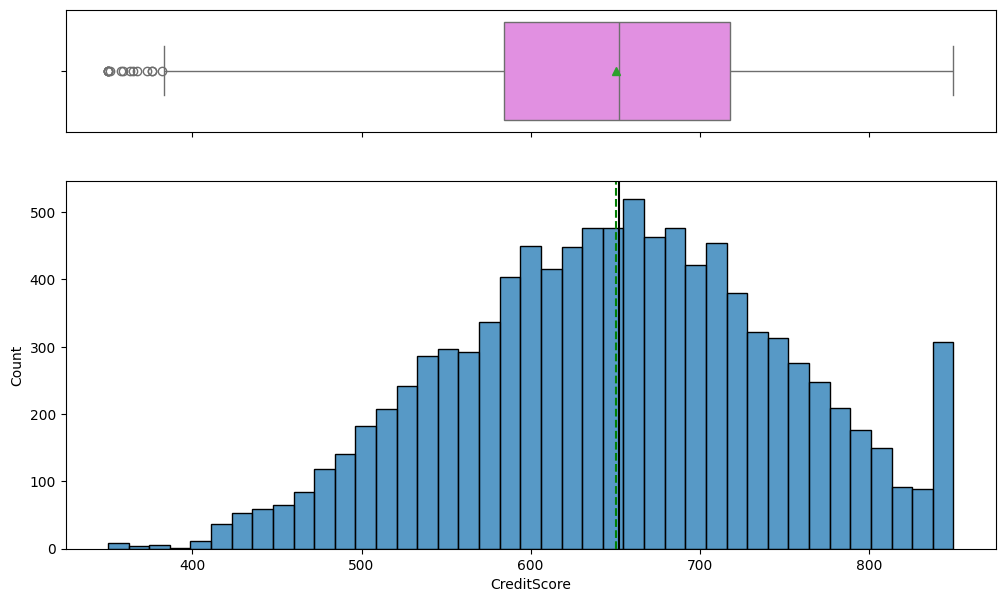

In [ ]:
histogram_boxplot(ds,'CreditScore')

**Observation**


*   Min to max credit score ranges from 350  to about 850.

*   About ~520 customers have a credit score between 650 ~ 680

*   There are outliers on the lower end but the data is normally distributed.



#### Observations on Age

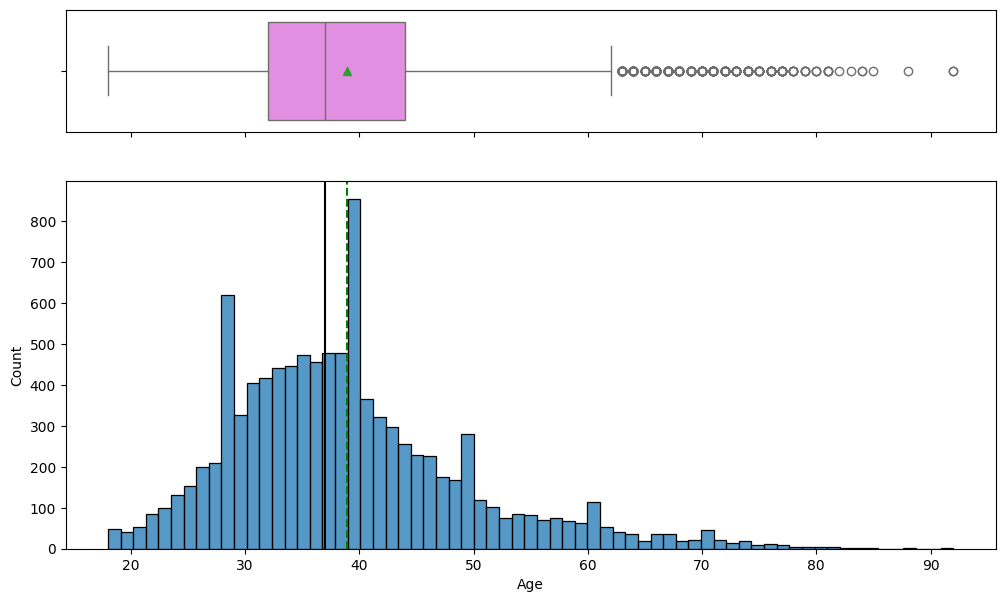

In [ ]:
histogram_boxplot(ds,'Age')

**Observation**


*   Min to max age ranges from 18 to 92. There are  young and very aged customers.

*   About ~800 customers fall in the age range of 40 to 42.
*   There are outliers above the 3rd quartile range and data is right skewed.



#### Observations on Balance

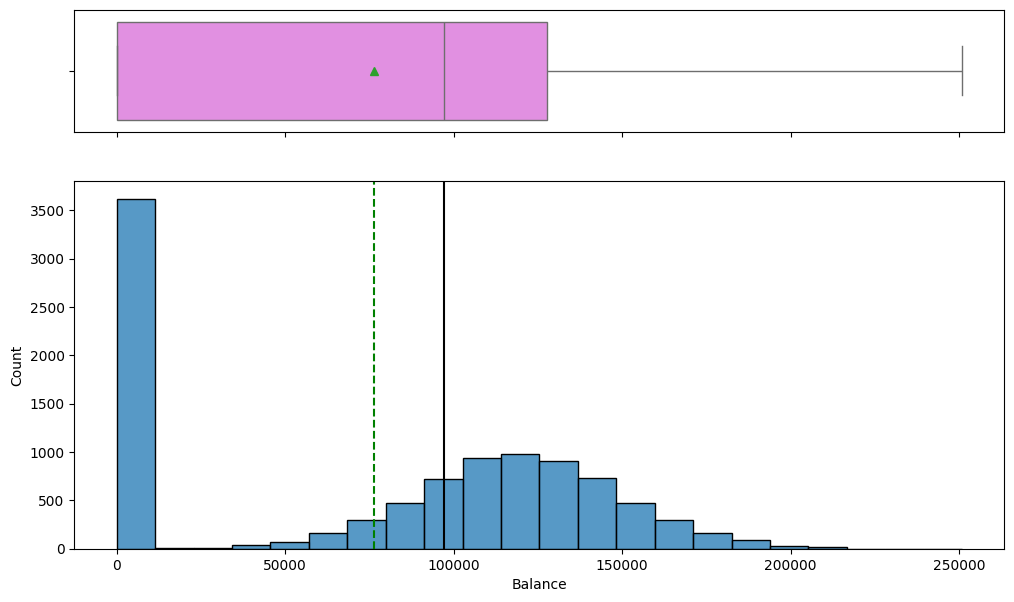

In [ ]:
histogram_boxplot(ds,'Balance')

**Observation**


*   Min to max balance ranges from 0 to 2,50,000.

*   About ~3500 customers  have a zero balance  .

*   Most of the customers seems to have a balance on the lower end.

*   There are no outliers but the data is highly left skewed.


#### Observations on Estimated Salary

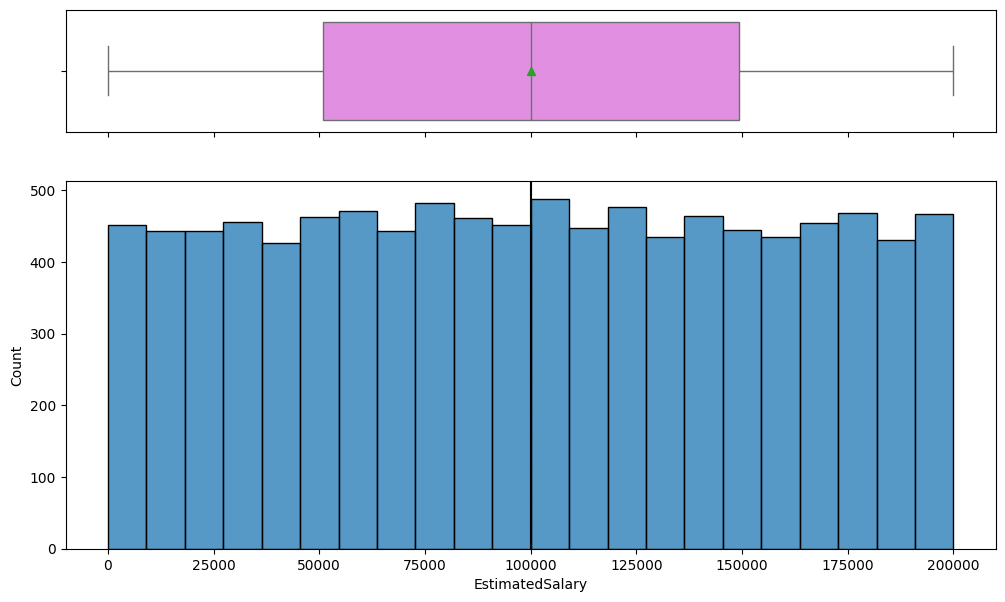

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')

**Observation**



*   Min to max salary ranges between ~0 and  ~2,00,000
*   Data is normally distributed and there are customers having all range of salary.



#### Observations on Tenure

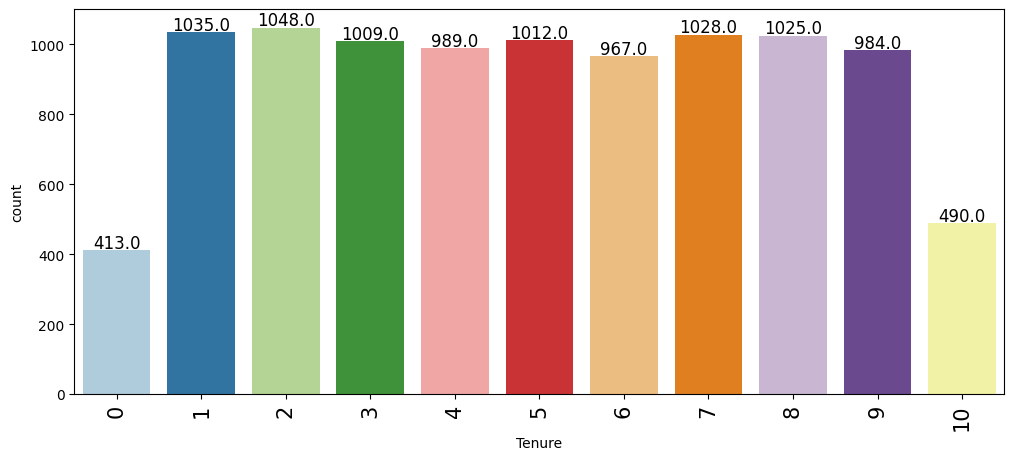

In [ ]:
labeled_barplot(ds,'Tenure')

**Observation**



*   Min to max tenure in years ranges between 0 and 10.
*   There are about 490 customers who have been with the bank for about 10 years.

*   There are about 1048 customers who have been with the bank for about 2 years followed by max customers who have been  with the bank for about 1, 7 and 8 years .

*   Data is normally distributed.








#### Observations on Geography

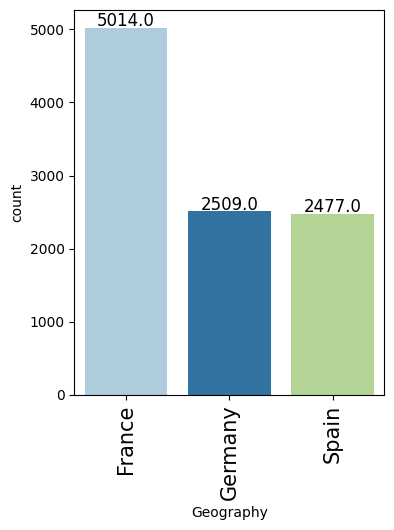

In [ ]:
labeled_barplot(ds,'Geography')

**Observation**



*  About 5014 customers are from France followed by 2509 customers from Germany and 2477 customers from Spain.



#### Observations on Gender

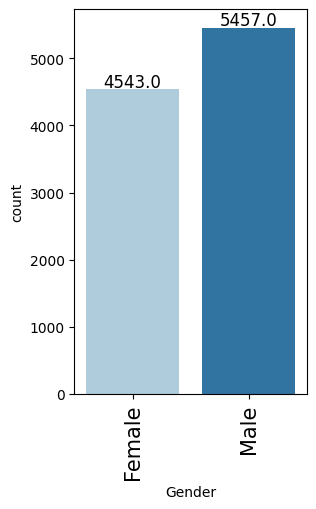

In [ ]:
labeled_barplot(ds,'Gender')

**Observation**



*   About 5457 customers are males and 4543 customers are females.



#### Observations on Number of Products

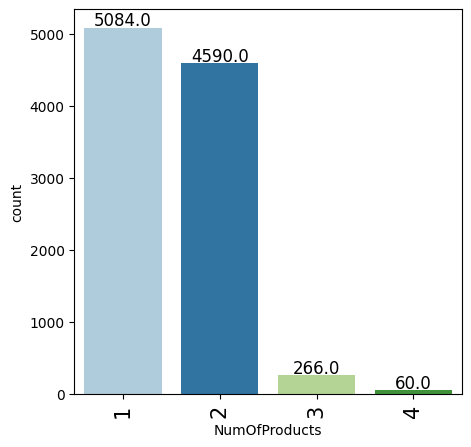

In [ ]:
labeled_barplot(ds,'NumOfProducts')

**Observation**



*  About 5084 customers owns product 1 followed by 4549 customers product 2    and 266 customers owning product 3.
*   Least number of customers about 60 have owned product 4 .



#### Observations on Has Credit Card

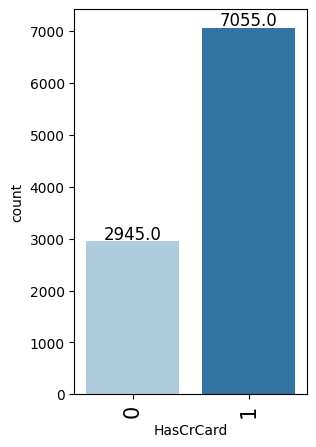

In [ ]:
labeled_barplot(ds,'HasCrCard')

**Observation**



*   Most of the customers have credit card. About 7055 customers holds credit cards and 2945 does not have a credit card.




#### Observations on Is Active Member

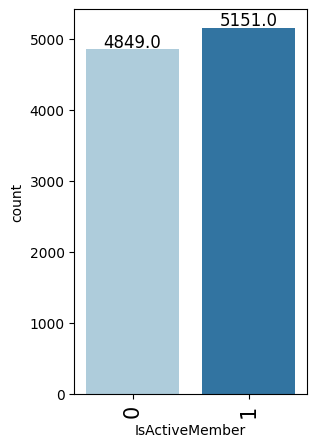

In [ ]:
labeled_barplot(ds,'IsActiveMember')

**Observation**


*   Most of the customers are active. About 5151 customers are active and 4849 are inactive.



#### Observations on Exited

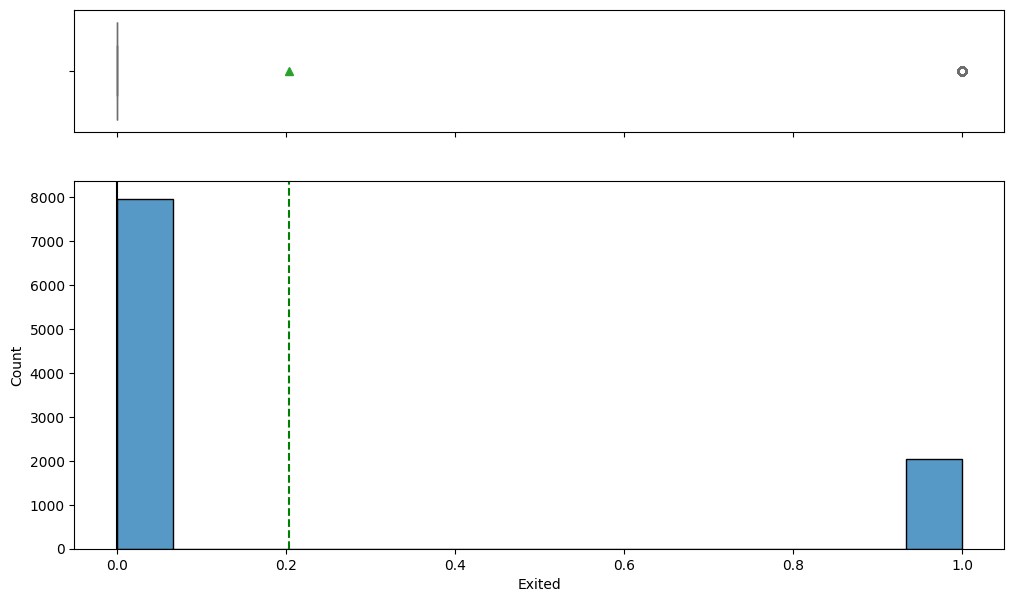

In [ ]:
histogram_boxplot(ds,'Exited')

**Observation**



*   Exited =0 indicates that the customers are still with the bank . Most of the customers ~8000 are still with the bank indicated by the count . There are few customers ~ 2000 who have left bank services.




### Bivariate Analysis

In [15]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","NumOfProducts","Tenure","Balance","EstimatedSalary","HasCrCard","IsActiveMember","Exited"]

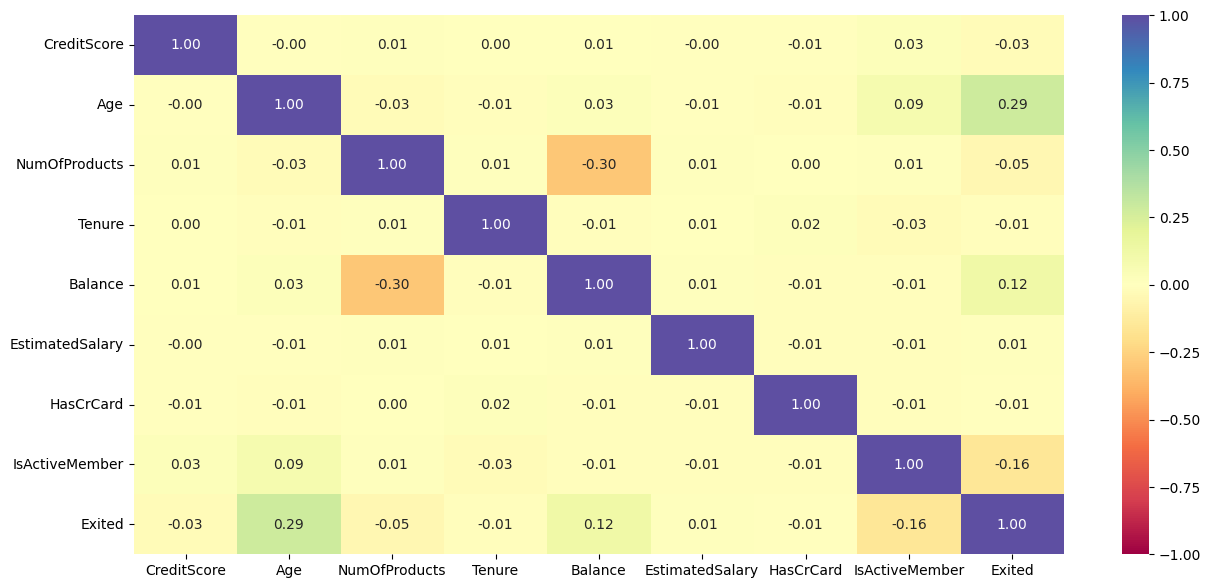

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation**


*   There is a negative correlation between Credit Score and  Exited column which implies that customers having low credit score have evenutally left the bank.
*   There is a negative correlation between Credit Score and  Estimated Salary column which implies that customers having low income/salary  have  low credit score as well.


*   There is a positive correlation between Age and Exited column which implies that customers who are young tend to stay with the bank services.
*  There is a negative correlation between NumOfProducts and Balance. Customers owning more number of products seem to have low balance.







#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


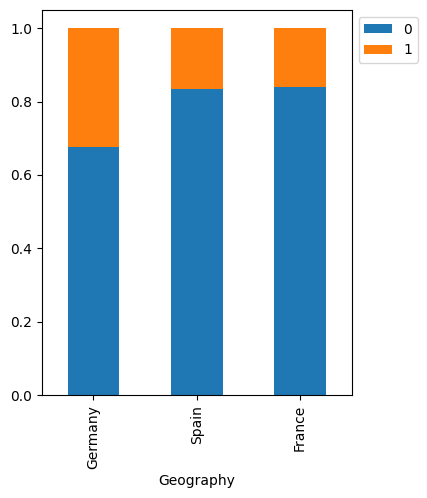

In [16]:
stacked_barplot(ds, "Geography", "Exited" )

**Observation**



*   Most of the customers about 814 have left the bank services from location Germany followed by 810 customers from France and 413 from Spain
*   Most of the customers about 2064 from Spain have stayed with the bank services.



#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


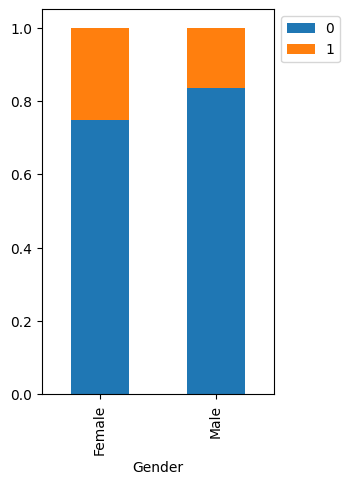

In [ ]:
stacked_barplot(ds, "Gender", "Exited" )

**Observation**

*   Most of the customers who have left the bank services are females  about 1139.


#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


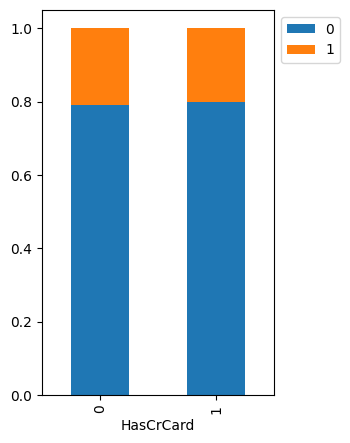

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited" )

**Observation**



*   Most of the customers having credit card about 5631 have stayed with the bank. About 1424 customers having credit card have left the bank.


*  About 2332 customers who doesnt have a credit card have stayed with bank. About 613  who doesnt have a credit card have left the bank.





#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


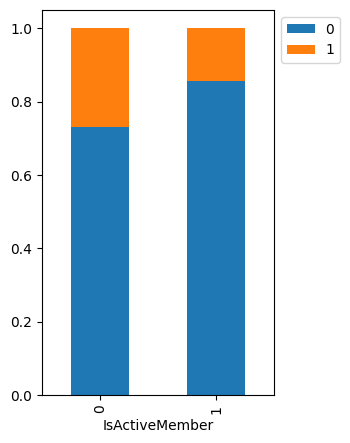

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

**Observation**



*   About 3547 are inactive. About 1302 inactive customers have left the bank services.

*   Most of the customers are active about 4416. About 735 active customers have left the bank services.




#### Exited Vs Credit Score

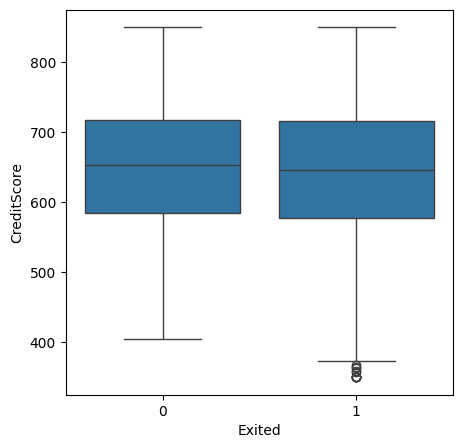

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

**Observation**


*   Customers who have left the bank services seems to be having low credit card score when compared to customers who have stayed with the bank


#### Exited Vs Age

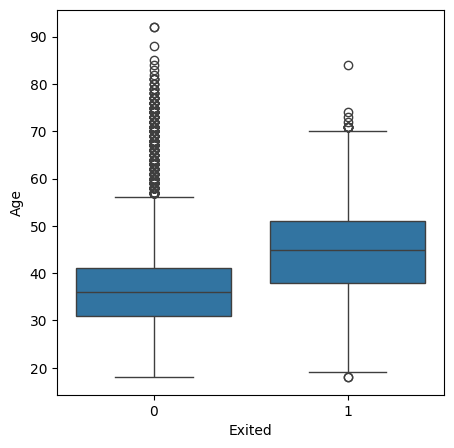

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

**Observation**



*   Customers who have stayed with bank falls under age group 30 ~40 when compared to customers who have left the bank.

*  Customers falling under age group 38~ 50 have left the bank.
*   There are outliers indicating that few very aged customers have stayed with the bank as well.



#### Exited Vs Tenure

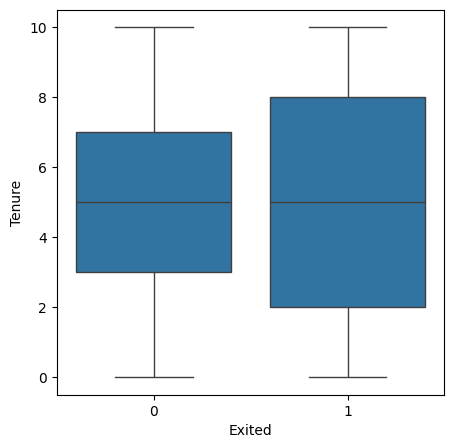

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

**Observation**


*   Customers having 8 years of tenure with bank have also left the services and customer having 2 years of tenure have also left servuces
*   At this point,  tenure with the bank does not seem to be influencing the Exited flag.



#### Exited Vs Balance

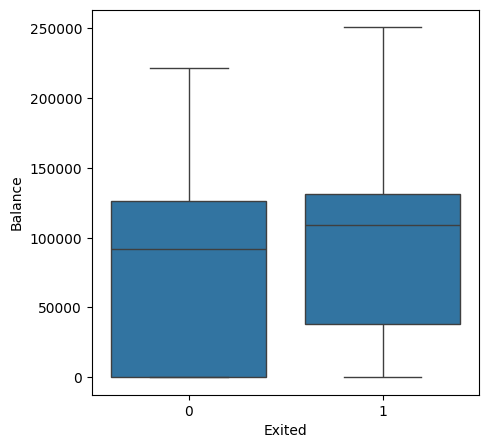

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

**Observation**



*   There are customers with balance ranging between 40,000 and 140000 who have left the bank services. There are also customers having similar balance but who have stayed with the bank.
*   At this point,  balance does not seem to be influencing the Exited flag.



#### Exited Vs Number of Products

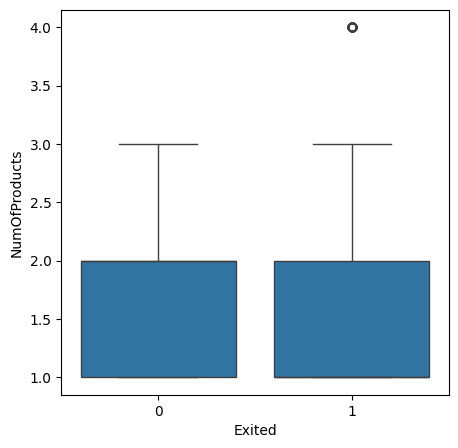

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

**Observation**


*   Customers who have stayed with bank and who have exited seem to have similar set of products.


*    At this point,  number of products does not seem to be influencing the Exited flag.





#### Exited Vs Estimated Salary

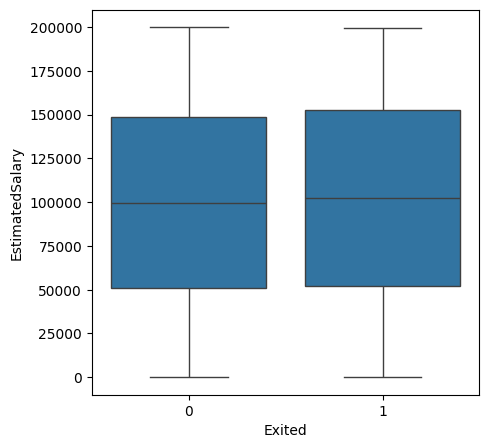

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

**Observation**



*   Estimated salaries of customers have stayed with bank & who have left  falls between 50,000 ~ 150,000.
*  At this point, estimated salary does not seem to be directly influencing the Exited flag.



## Data Preprocessing

### Outlier Detection

In [10]:
#Lets get numeric columns only to check for data outliers.
#We have seen in EDA that there were lot of outliers in numeric columns

data_numeric_only = ds.select_dtypes(exclude=["object","category"])
Q1 = data_numeric_only.quantile(0.25)  # To find the 25th percentile
Q3 = data_numeric_only.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

# checking the % outliers
((ds.select_dtypes(include=["float64", "int64"]) < lower) | (ds.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

CreditScore         0.15
Age                 3.59
Tenure              0.00
Balance             0.00
NumOfProducts       0.60
HasCrCard           0.00
IsActiveMember      0.00
EstimatedSalary     0.00
Exited             20.37
dtype: float64

**Observation**


*   We could exclude Exited flag from the outlier analysis since that is our target.
*   There are outliers about ~3 to 4% in columns like Age. Since its only a small percent  of data , it is good not to treat them.


*   There are outliers about0.15 % in column Credit Score and 0.6% in column NumOfProducts.Since its only a small percent  of data , it is good not to treat them.

**There are no missing values in any columns . Therefore preprocessing does not require missing value treatment**

## Train-validation-test Split

In [11]:
X = ds.drop(['Exited'],axis=1) # Drop target variable from the independent variables
y = ds['Exited'] # Exited

#### Dummy Variable Creation

In [12]:
# Select the object type columns for creating dummy variables
X = pd.get_dummies(X,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=int)

#### Data Normalization

In [13]:
#Standardizing the numerical variables to zero mean and unit variance.
# Define the columns to scale
num_columns = ["CreditScore", "Balance", "EstimatedSalary", "Age", "Tenure", "NumOfProducts"]#Get all numerical columns

transformer = StandardScaler()
X[num_columns] = transformer.fit_transform(X[num_columns])

In [14]:
# Splitting the dataset into the Large and Testing set.
# first we split data into 2 parts, say large and test. Test will have 20% of data and X_large will have the rest 80%


X_large, X_test, y_large, y_test = train_test_split(X, y, test_size =0.2, random_state = 42,stratify=y,shuffle = True)

In [15]:
# Splitting the dataset into the Training and validation set.
# then we split the temporary set into train and validation.Train will have 75% and val will have the rest 25%

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size =0.25, random_state = 42,stratify=y_large, shuffle = True)

In [16]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6000
Number of rows in validation data = 2000
Number of rows in test data = 2000


In [17]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(6000, 11) (6000,)
(2000, 11) (2000,)
(2000, 11) (2000,)


In [18]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


**Observation**



*   There are 11 columns in train, validation and test data .This looks good.
*   No rows have been dropped from the dataset as well.




#### Missing Value Treatment

There are no null values in the dataset and therefore missing vaue treatment is NOT required.

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
1. Predicting a customer as looking to leave bank services but in reality, the customer is not looking for leaving services - Loss of resources
2. Predicting a customer as NOT looking to leave bank services but the customer is looking for leaving services  - Loss of opportunity

**Which case is more important?**
* Predicting a customer as NOT looking to leave bank services but the customer is looking for leaving services  i.e. losing on a potential customer as the customer will not be targeted by the bank when he should be targeted.

**How to reduce this loss i.e need to reduce False Negatives?**
* Bank would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

-


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [33]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [32]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [19]:
#Defining the list of metrics to be used for all the models.
metrics = [tf.keras.metrics.Recall(name="recall")]

In [20]:
#Defining dataframe to display results
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])


In [21]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2560184216035168, 1: 4.905968928863451}

In [22]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 80
batch_size = 100

First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results everytime we run the code.

In [23]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

##**Initial Model Building**

### Model 1 : Neural Network with SGD Optimizer

In [24]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [25]:
#Initializing the neural network
model_1_orig = Sequential()
# Adding the input layer with 11 input features and first hidden layer with 128 neurons and relu as activation function
model_1_orig .add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
# Hidden layer with 64 neurons and activation as relu
model_1_orig .add(Dense(64, activation='relu'))
# Hidden layer with 32 neurons and activation as relu
model_1_orig .add(Dense(32, activation='relu'))
# Hidden layer with 16 neurons and activation as relu
model_1_orig .add(Dense(16, activation='relu'))
# Hidden layer with 8 neurons and activation as relu
model_1_orig .add(Dense(8, activation='relu'))
# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_1_orig .add(Dense(1, activation = 'sigmoid'))

Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.

Since this is a binary classification task, we will be minimizing the **binary_crossentropy** and we can choose one optimizer out of
1.   SGD
2.   RMSprop
3.   Adam
4.   Adadelta
5.   Adagrad
6.   Adamax
7.   Nadam
8.   Ftrl

In [26]:
#Let's use SGD as optimizer with a learning rate

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

In [27]:
# compiling the model
model_1_orig.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [28]:
model_1_orig.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12545 (49.00 KB)
Trainable params: 12545 (

**Observation**


*   From the above summary, we can see that this architecture will train a total of **12545** parameters i.e. weights and biases in the network.




In [29]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_1_orig = model_1_orig.fit(X_train, y_train, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs,class_weight=cw_dict)

end=time.time()

Epoch 1/80
60/60 [==============================] - 4s 67ms/step - loss: 1.3818 - recall: 0.2984 - val_loss: 0.6862 - val_recall: 0.2580
Epoch 2/80
60/60 [==============================] - 3s 44ms/step - loss: 1.3817 - recall: 0.3034 - val_loss: 0.6862 - val_recall: 0.2604
Epoch 3/80
60/60 [==============================] - 3s 43ms/step - loss: 1.3816 - recall: 0.3083 - val_loss: 0.6862 - val_recall: 0.2629
Epoch 4/80
60/60 [==============================] - 2s 42ms/step - loss: 1.3816 - recall: 0.3083 - val_loss: 0.6862 - val_recall: 0.2629
Epoch 5/80
60/60 [==============================] - 4s 59ms/step - loss: 1.3815 - recall: 0.3115 - val_loss: 0.6862 - val_recall: 0.2703
Epoch 6/80
60/60 [==============================] - 3s 56ms/step - loss: 1.3814 - recall: 0.3164 - val_loss: 0.6863 - val_recall: 0.2703
Epoch 7/80
60/60 [==============================] - 3s 49ms/step - loss: 1.3814 - recall: 0.3230 - val_loss: 0.6863 - val_recall: 0.2752
Epoch 8/80
60/60 [=======================

In [30]:
print("Time taken in seconds ",end-start)

Time taken in seconds  247.5302460193634


**Observation**



*   For all 80 epochs,  loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation  set(val_recall) is calculated as well.

Lets plot a graph





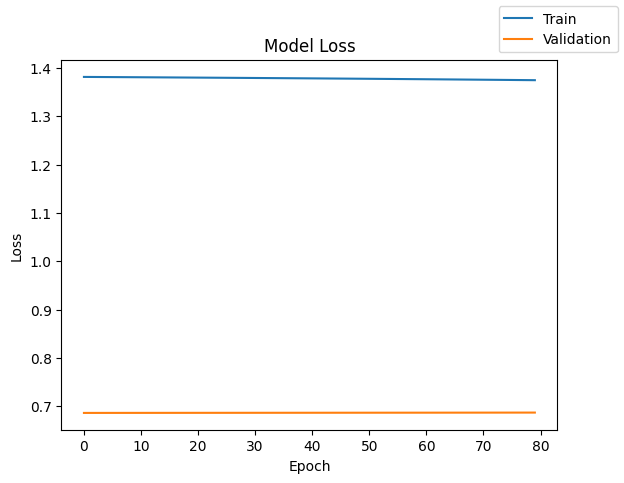

In [35]:
plot(history_1_orig,'loss')

**Observation**



*    The flat loss curve suggests that the loss function is not decreasing, meaning the model isn't learning effectively.



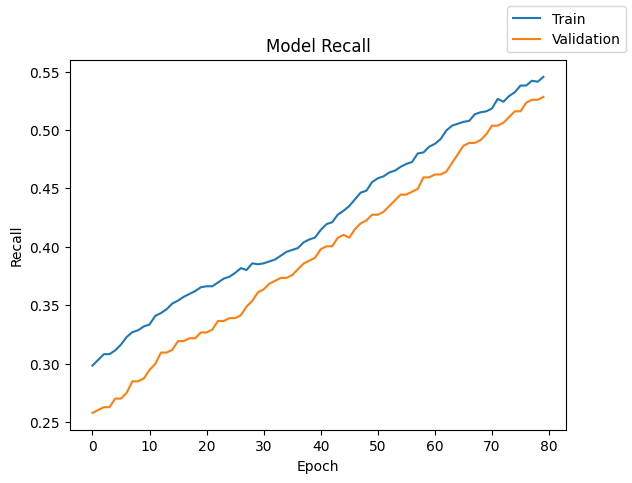

In [36]:
plot(history_1_orig,'recall')

**Observation**

*   The rapid increase in recall followed by oscillation and a gradual decrease implies that the model initially learns some patterns but struggles to maintain or improve its performance.





In [37]:
#Predicting the results using best as a threshold
y_train_pred = model_1_orig.predict(X_train)
y_train_pred = (y_train_pred > 0.5) #Lets use 0.5 as a threshold for predicting True /False
y_train_pred

188/188 [==============================] - 3s 14ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [38]:
#Predicting the results using best as a threshold
y_val_pred = model_1_orig.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 1s 13ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [39]:
#Lets add the recall scores to the data frame
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [40]:
train_metric_df

,recall
NN with SGD,0.54538


In [41]:
valid_metric_df

,recall
NN with SGD,0.528256


**Observation**



*   Recall scores on training set is about 0.54 and is about ~0.528 in validation set. Recall scores on both sets seems to be pretty close and but the score needs to be improved.




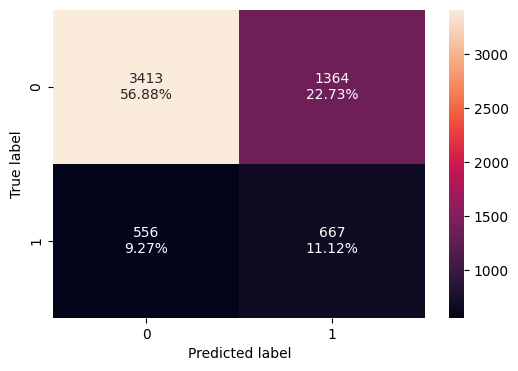

In [42]:
make_confusion_matrix(y_train, y_train_pred)

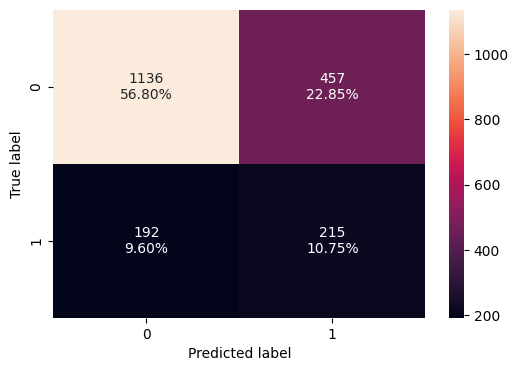

In [43]:
make_confusion_matrix(y_val, y_val_pred)

**Observation**



*   Confusion matrix displays that on the training set , the model has predicted 11.12% of True positives and 9.27 % of false negatives.
*   Confusion matrix displays that on the validation set , the model has predicted 10.75% of True positives and 9.6 % of false negatives.

Lets see if we can reduce the false negatives on the validation set.





## Model Performance Improvement

### Model 2: Neural Network with Adam Optimizer

In [44]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [97]:
X_train.shape

(6000, 11)

Lets try with 64/32/16 set of neurons for this model instead of adding more parameters to the model

In [45]:
#Initializing the neural network
model_2_orig = Sequential()
# Adding the input layer with 11 input features and first hidden layer with 64 neurons and relu as activation function
model_2_orig .add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Hidden layer with 32 neurons and activation as relu
model_2_orig .add(Dense(32, activation='relu'))
# Hidden layer with 16 neurons and activation as relu
model_2_orig .add(Dense(16, activation='relu'))
# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_2_orig .add(Dense(1, activation = 'sigmoid'))

In [46]:
#Let's use Adam as optimizer with a learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [47]:
# compiling the model
model_2_orig.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [48]:
model_2_orig.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observation**


*   From the above summary, we can see that this architecture will train a total of **3393** parameters i.e. weights and biases in the network.

In [49]:

#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_2_orig = model_2_orig.fit(X_train, y_train, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs,class_weight=cw_dict)

end=time.time()

Epoch 1/80
60/60 [==============================] - 3s 50ms/step - loss: 1.4331 - recall: 0.8791 - val_loss: 0.8147 - val_recall: 0.9828
Epoch 2/80
60/60 [==============================] - 3s 51ms/step - loss: 1.3832 - recall: 0.9796 - val_loss: 0.7644 - val_recall: 0.9582
Epoch 3/80
60/60 [==============================] - 5s 82ms/step - loss: 1.3499 - recall: 0.9403 - val_loss: 0.7279 - val_recall: 0.8968
Epoch 4/80
60/60 [==============================] - 6s 103ms/step - loss: 1.3191 - recall: 0.8741 - val_loss: 0.6998 - val_recall: 0.8256
Epoch 5/80
60/60 [==============================] - 3s 46ms/step - loss: 1.2848 - recall: 0.8128 - val_loss: 0.6721 - val_recall: 0.7838
Epoch 6/80
60/60 [==============================] - 3s 49ms/step - loss: 1.2479 - recall: 0.7866 - val_loss: 0.6505 - val_recall: 0.7396
Epoch 7/80
60/60 [==============================] - 4s 73ms/step - loss: 1.2125 - recall: 0.7621 - val_loss: 0.6291 - val_recall: 0.7297
Epoch 8/80
60/60 [======================

In [50]:
print("Time taken in seconds ",end-start)

Time taken in seconds  271.7307469844818


**Observation**



*   For all 80 epochs,  loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation  set(val_recall) is calculated as well.

Lets plot a graph

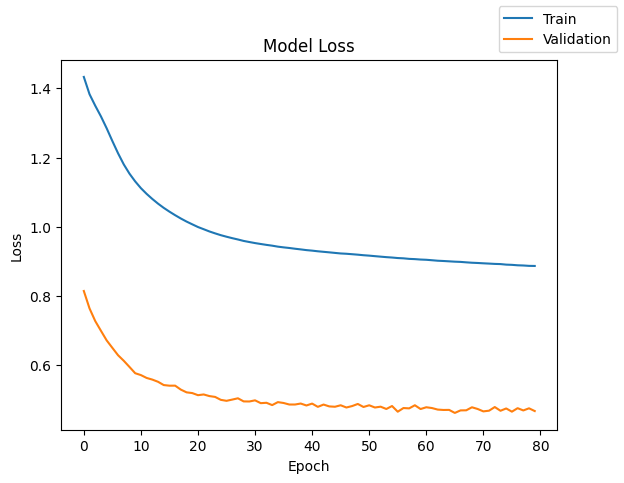

In [51]:
plot(history_2_orig,'loss')



**Observation**


*   Training set and validation set both shows a loss to be consistent and is descending.
*  Validation loss is much lesser than training loss which is good.

*   Model seems to be learning effectively.

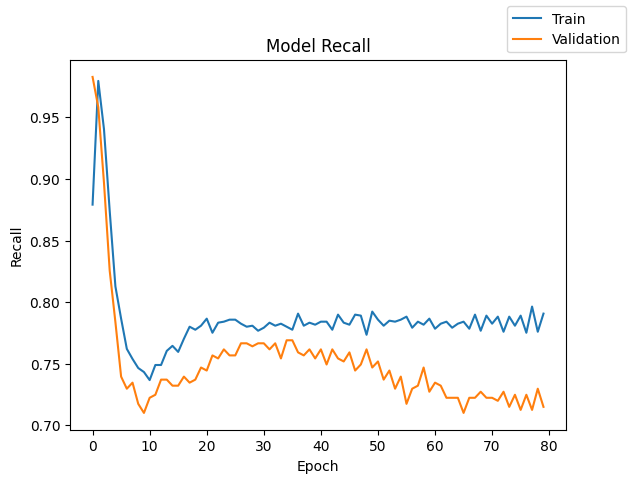

In [52]:
plot(history_2_orig,'recall')

**Observation**

*   Recall scores on both training and validation set decreases rapidly and starts oscillating after 10th epoch.

*   After the initial decrease, the recall score starts to oscillate with a slight upward trend, indicating that the model is learning to recover and improve its recall





In [53]:
#Predicting the results using best as a threshold
y_train_pred_2 = model_2_orig.predict(X_train)
y_train_pred_2 = (y_train_pred_2 > 0.5)
y_train_pred_2

188/188 [==============================] - 1s 5ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [54]:
#Predicting the results using best as a threshold
y_val_pred_2 = model_2_orig.predict(X_val)
y_val_pred_2 = (y_val_pred_2 > 0.5)
y_val_pred_2


63/63 [==============================] - 0s 5ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [55]:
#Lets add the recall scores to the data frame
model_name = "NN with ADAM"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred_2)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_2)

In [56]:
train_metric_df

,recall
NN with SGD,0.54538
NN with ADAM,0.78332


In [57]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.714988



**Observation**

*   Recall scores on training set is about 0.78 and is about ~0.71 in validation set for model NN with Adam.





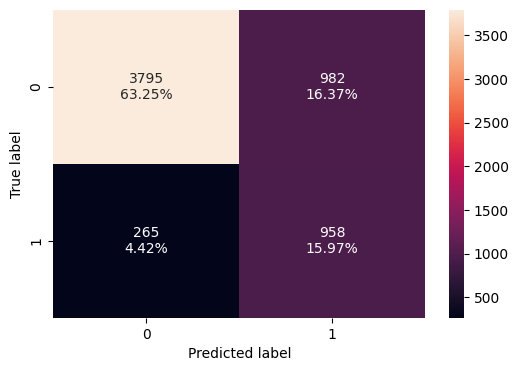

In [58]:
make_confusion_matrix(y_train, y_train_pred_2)

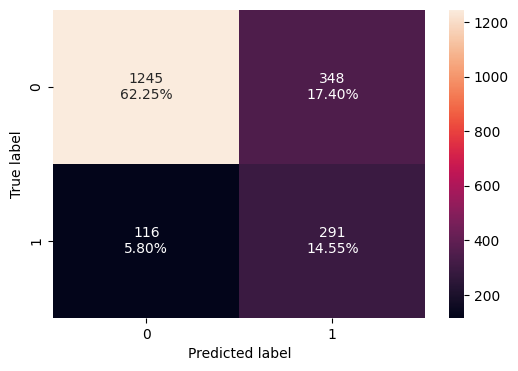

In [59]:
make_confusion_matrix(y_val, y_val_pred_2)

**Observation**



*   Confusion matrix displays that on the training set , the model has predicted 16 % of True positives and 4.42 % of false negatives.
*   Confusion matrix displays that on the validation set , the model has predicted 14.55% of True positives and5.80 % of false negatives.

Lets see if we can reduce the false negatives on the validation set.

### Model 3: Neural Network with Adam Optimizer and Dropout

In [60]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [61]:
#Initializing the neural network
model_3_orig = Sequential()

model_3_orig .add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Hidden layer with 32 neurons and activation as relu
model_3_orig .add(Dense(32, activation='relu'))
#Add drop out of 0.2 i.e 20% of neurons will be dropped
model_3_orig.add(Dropout(0.2))
# Hidden layer with 16 neurons and activation as relu
model_3_orig .add(Dense(16, activation='relu'))
#Add drop out of 0.1 i.e 10% of neurons will be dropped
model_3_orig.add(Dropout(0.1))

# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_3_orig .add(Dense(1, activation = 'sigmoid'))

In [62]:
#Let's use Adam as optimizer with a learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [63]:
# compiling the model
model_3_orig.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [64]:
model_3_orig.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13

**Observation**


*   From the above summary, we can see that this architecture will train a total of **3393** parameters i.e. weights and biases in the network.

In [65]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_3_orig = model_3_orig.fit(X_train, y_train, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs,class_weight=cw_dict)

end=time.time()

Epoch 1/80
60/60 [==============================] - 5s 80ms/step - loss: 1.3679 - recall: 0.5755 - val_loss: 0.6663 - val_recall: 0.4988
Epoch 2/80
60/60 [==============================] - 4s 62ms/step - loss: 1.3456 - recall: 0.6043 - val_loss: 0.6595 - val_recall: 0.5602
Epoch 3/80
60/60 [==============================] - 3s 55ms/step - loss: 1.3292 - recall: 0.6182 - val_loss: 0.6452 - val_recall: 0.5897
Epoch 4/80
60/60 [==============================] - 5s 81ms/step - loss: 1.3066 - recall: 0.6231 - val_loss: 0.6326 - val_recall: 0.6167
Epoch 5/80
60/60 [==============================] - 5s 75ms/step - loss: 1.2879 - recall: 0.6427 - val_loss: 0.6176 - val_recall: 0.6241
Epoch 6/80
60/60 [==============================] - 4s 61ms/step - loss: 1.2572 - recall: 0.6590 - val_loss: 0.6056 - val_recall: 0.6462
Epoch 7/80
60/60 [==============================] - 4s 67ms/step - loss: 1.2371 - recall: 0.6672 - val_loss: 0.5923 - val_recall: 0.6536
Epoch 8/80
60/60 [=======================

**Observation**



*   For all 80 epochs,  loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation  set(val_recall) is calculated as well.

In [66]:
print("Time taken in seconds ",end-start)

Time taken in seconds  324.8417263031006


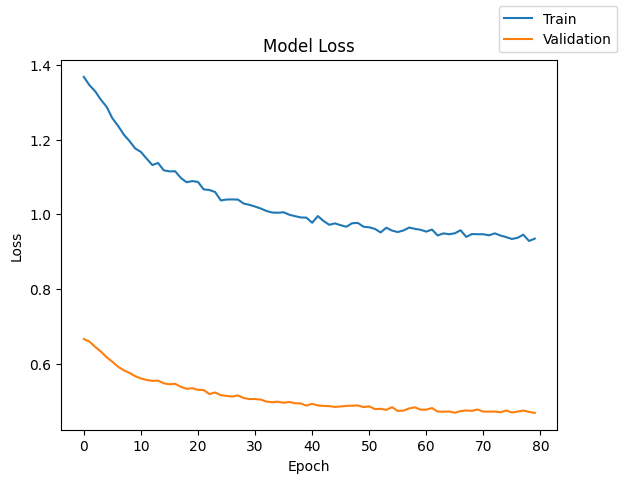

In [67]:
plot(history_3_orig,'loss')

**Observation**


*   Training set shows a decrease in loss though it is fluctuating. Model seems to be learning gradually.
*   Validation set shows  a decrease in loss and loss almost flattens after about 70 epochs though with few oscillations.

*   Oscillations could be due to  learning rate being higher but overall, model seems to be learning effectively.




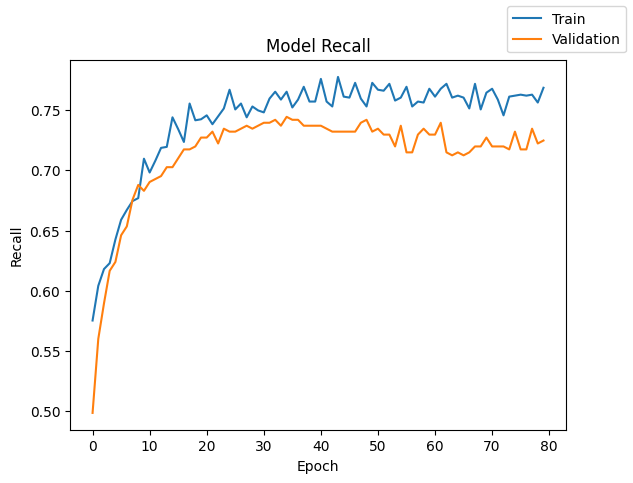

In [70]:
plot(history_3_orig,'recall')



**Observation**


*   Recall scores on both training and validation test did increase but seems to be fluctuating after 0.75 recall score at 10th epoch.

*   Model seems to identify positive instances more accurately. Fluctuations in recall score after a certain epoch may indicate signs of overfitting after a certain point.




In [71]:
#Predicting the results using best as a threshold
y_train_pred_3 = model_3_orig.predict(X_train)
y_train_pred_3 = (y_train_pred_3 > 0.5)
y_train_pred_3

188/188 [==============================] - 3s 15ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [72]:
#Predicting the results using best as a threshold
y_val_pred_3 = model_3_orig.predict(X_val)
y_val_pred_3 = (y_val_pred_3 > 0.5)
y_val_pred_3


63/63 [==============================] - 0s 6ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [73]:
#Lets add the recall scores to the data frame
model_name = "NN with ADAM Dropout"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred_3)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_3)

In [74]:
train_metric_df

,recall
NN with SGD,0.545380
NN with ADAM,0.783320
NN with ADAM Dropout,0.767784


In [75]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.714988
NN with ADAM Dropout,0.724816


**Observation**



*   Recall scores on training set is about 0.767 and is about ~0.724 in validation set for the current NN with Adam dropout model.

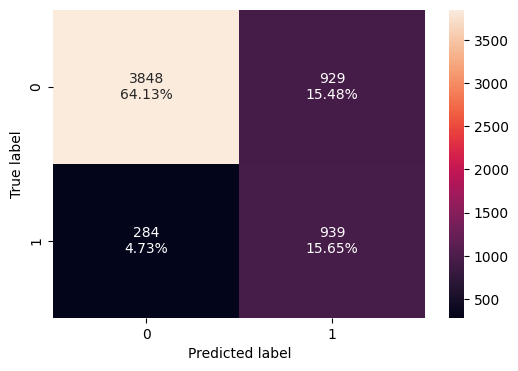

In [76]:
make_confusion_matrix(y_train, y_train_pred_3)

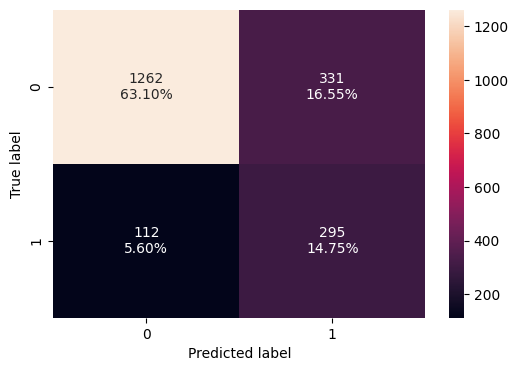

In [77]:
make_confusion_matrix(y_val, y_val_pred_3)

**Observation**


*   Confusion matrix displays that on the training set , the model has predicted 15.65% of True positives and 4.73 % of false negatives.
*   Confusion matrix displays that on the validation set , the model has predicted 14.75% of True positives and 5.60 % of false negatives.

Lets see if we can reduce the false negatives on the validation set.

### Model 4: Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Since we are dealing with imbalanced data sets, one of the technique to balance data set is to oversample the minority class. This type of data augmentation is called SMOTE. SMOT uses KNN algorithm in the background.Lets see how this is achieved.

In [78]:
print("Before Oversampling, counts of label 'NonExisting customers': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Existing customers': {} \n".format(sum(y_train == 0)))

Before Oversampling, counts of label 'NonExisting customers': 1223
Before Oversampling, counts of label 'Existing customers': 4777 



In [79]:
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=42
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'NonExisting customers': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Existing customers': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, counts of label 'NonExisting customers': 4777
After Oversampling, counts of label 'Existing customers': 4777 

After Oversampling, the shape of train_X: (9554, 11)
After Oversampling, the shape of train_y: (9554,) 



**Observation**



*  After Oversampling, counts of label 'NonExisting customers'is 4777
*  After Oversampling, counts of label 'Existing customers'is 4777


In [80]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [81]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [82]:
#Initializing the neural network
model_4_smote = Sequential()

model_4_smote .add(Dense(64, activation='relu', input_dim = X_train_over.shape[1])) #Use smote train data set
# Hidden layer with 32 neurons and activation as relu
model_4_smote .add(Dense(32, activation='relu'))
# Hidden layer with 16 neurons and activation as relu
model_4_smote .add(Dense(16, activation='relu'))
# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_4_smote .add(Dense(1, activation = 'sigmoid'))

In [83]:
#Let's use SGD as optimizer with a learning rate

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)



In [84]:
# compiling the model
model_4_smote.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [85]:
model_4_smote.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observation**


*   From the above summary, we can see that this architecture will train a total of **3393** parameters i.e. weights and biases in the network.

In [86]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_4_smote = model_4_smote.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs)

end=time.time()

Epoch 1/80
96/96 [==============================] - 5s 45ms/step - loss: 0.6836 - recall: 0.5068 - val_loss: 0.6750 - val_recall: 0.4300
Epoch 2/80
96/96 [==============================] - 4s 38ms/step - loss: 0.6835 - recall: 0.4884 - val_loss: 0.6749 - val_recall: 0.4300
Epoch 3/80
96/96 [==============================] - 4s 41ms/step - loss: 0.6834 - recall: 0.4888 - val_loss: 0.6748 - val_recall: 0.4300
Epoch 4/80
96/96 [==============================] - 5s 54ms/step - loss: 0.6832 - recall: 0.4907 - val_loss: 0.6747 - val_recall: 0.4300
Epoch 5/80
96/96 [==============================] - 4s 41ms/step - loss: 0.6831 - recall: 0.4928 - val_loss: 0.6747 - val_recall: 0.4300
Epoch 6/80
96/96 [==============================] - 4s 39ms/step - loss: 0.6830 - recall: 0.4936 - val_loss: 0.6746 - val_recall: 0.4300
Epoch 7/80
96/96 [==============================] - 4s 45ms/step - loss: 0.6829 - recall: 0.4951 - val_loss: 0.6745 - val_recall: 0.4324
Epoch 8/80
96/96 [=======================

In [87]:
print("Time taken in seconds ",end-start)

Time taken in seconds  341.05178213119507


**Observation**



*   For all 80 epochs,  loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation  set(val_recall) is calculated as well.


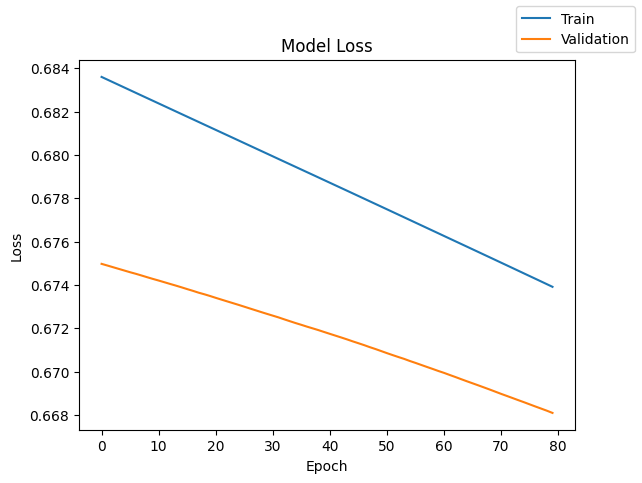

In [88]:
plot(history_4_smote,'loss')

**Observation**



*   Training and validation set shows a steady  decrease in loss function.


*   A straight line suggests that the loss reduction per epoch is constant
and it appears that there is a consistent improvement in the model's performance.



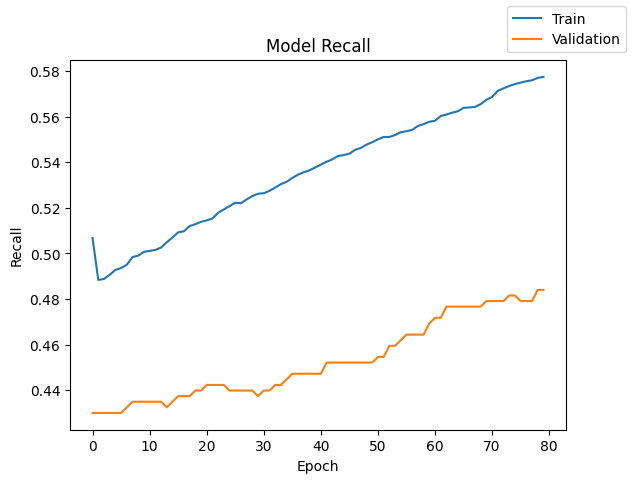

In [89]:
plot(history_4_smote,'recall')

**Observation**


*   Both recall scores on training and validation data is increasing steadily with oscillations.

*   This pattern is typical in scenarios where the model is gradually learning to identify more true positives, but variability in the training data or learning process causes fluctuations.






In [90]:
#Predicting the results using best as a threshold
y_train_pred_4 = model_4_smote.predict(X_train_over)
y_train_pred_4 = (y_train_pred_4 > 0.5)
y_train_pred_4

299/299 [==============================] - 2s 6ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [91]:
#Predicting the results using best as a threshold
y_val_pred_4 = model_4_smote.predict(X_val)
y_val_pred_4 = (y_val_pred_4 > 0.5)
y_val_pred_4

63/63 [==============================] - 0s 5ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [92]:
#Lets add the recall scores to the data frame
model_name = "NN with Smote SGD"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred_4)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_4)


In [93]:
train_metric_df

,recall
NN with SGD,0.545380
NN with ADAM,0.783320
NN with ADAM Dropout,0.767784
NN with Smote SGD,0.578187


In [94]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.714988
NN with ADAM Dropout,0.724816
NN with Smote SGD,0.484029



**Observation**

*   Recall scores on training set is about 0.57 and is about ~0.48 in validation set for model NN with Smote SGD.

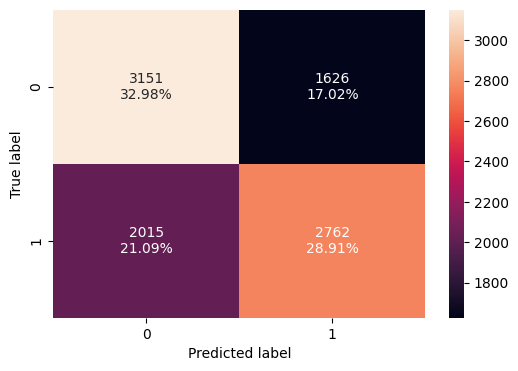

In [95]:
make_confusion_matrix(y_train_over, y_train_pred_4)

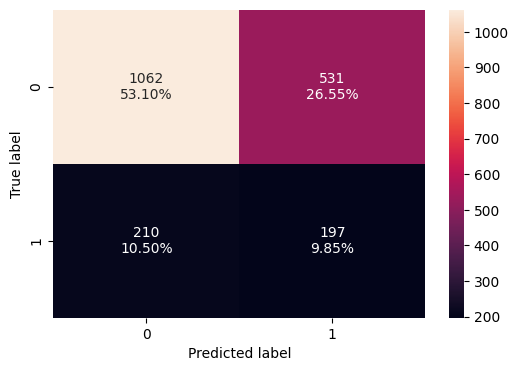

In [96]:
make_confusion_matrix(y_val, y_val_pred_4)

**Observation**



*   Confusion matrix displays that on the training set , the model has predicted 28.91% of True positives and 21.09% of false negatives.
*   Confusion matrix displays that on the validation set , the model has predicted 9.85% of True positives and 10.50 % of false negatives.

We can observe that False negatives on validation set is not in line with training set.

### Model 5: Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [97]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [98]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [99]:
#Initializing the neural network
model_5_smote = Sequential()

model_5_smote .add(Dense(64, activation='relu', input_dim = X_train_over.shape[1]))
# Hidden layer with 32 neurons and activation as relu
model_5_smote .add(Dense(32, activation='relu'))
# Hidden layer with 16 neurons and activation as relu
model_5_smote .add(Dense(16, activation='relu'))
# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_5_smote .add(Dense(1, activation = 'sigmoid'))

In [100]:
#Let's use Adam as optimizer with a learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [101]:

# compiling the model
model_5_smote.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)


In [102]:
model_5_smote.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observation**


*   From the above summary, we can see that this architecture will train a total of **3393** parameters i.e. weights and biases in the network.

In [103]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_5_smote = model_5_smote.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs)

end=time.time()

Epoch 1/80
96/96 [==============================] - 5s 50ms/step - loss: 0.6709 - recall: 0.5449 - val_loss: 0.6493 - val_recall: 0.5184
Epoch 2/80
96/96 [==============================] - 5s 51ms/step - loss: 0.6410 - recall: 0.6468 - val_loss: 0.6132 - val_recall: 0.5749
Epoch 3/80
96/96 [==============================] - 6s 68ms/step - loss: 0.6044 - recall: 0.6711 - val_loss: 0.5821 - val_recall: 0.6143
Epoch 4/80
96/96 [==============================] - 6s 58ms/step - loss: 0.5690 - recall: 0.7157 - val_loss: 0.5639 - val_recall: 0.6486
Epoch 5/80
96/96 [==============================] - 6s 65ms/step - loss: 0.5417 - recall: 0.7454 - val_loss: 0.5449 - val_recall: 0.6536
Epoch 6/80
96/96 [==============================] - 5s 52ms/step - loss: 0.5220 - recall: 0.7582 - val_loss: 0.5400 - val_recall: 0.6634
Epoch 7/80
96/96 [==============================] - 5s 48ms/step - loss: 0.5071 - recall: 0.7701 - val_loss: 0.5293 - val_recall: 0.6585
Epoch 8/80
96/96 [=======================

**Observation**


*   For all 80 epochs,  loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation  set(val_recall) is calculated as well.

In [104]:
print("Time taken in seconds ",end-start)

Time taken in seconds  434.0185217857361


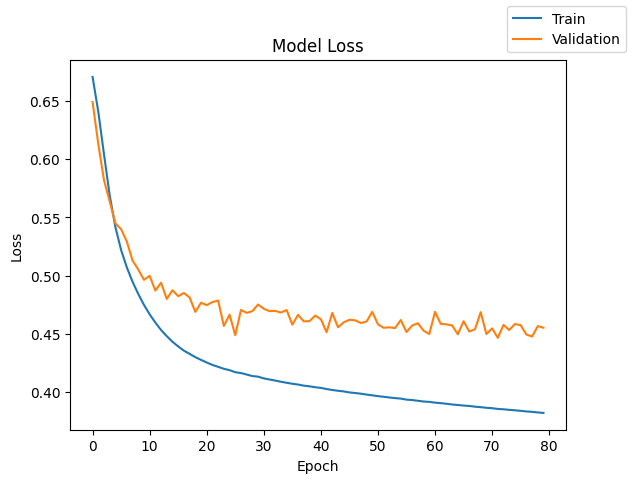

In [105]:
plot(history_5_smote,'loss')

**Observation**



*   Training and validation set shows a steady decrease in loss function which means that the model is learning and reducing errors.
*   Validation loss seems to be oscillating when the model is starting to overfit or may be due to high learning rate.

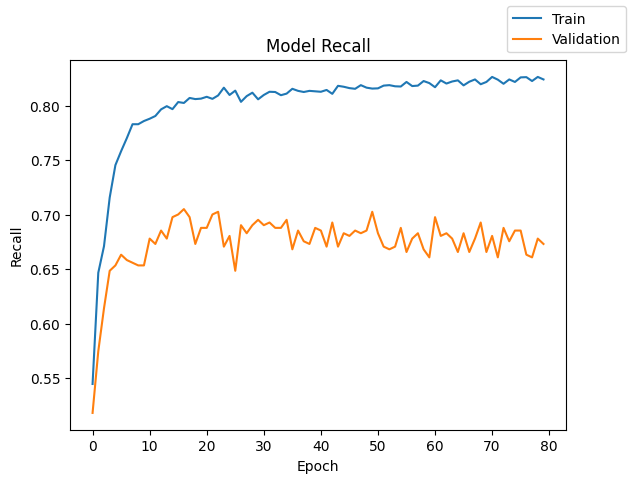

In [106]:
plot(history_5_smote,'recall')


**Observation**


*   Recall scores on both training and validation test seems to be on a increasing upwards.

*   Recall scores are oscillating indicating that model is starting to overfit or may be high learning rates were used.

*   This pattern is typical in scenarios where the model is gradually learning to identify more true positives, but variability in the training data or learning process causes fluctuations.








In [107]:
#Predicting the results using best as a threshold
y_train_pred_5 = model_5_smote.predict(X_train_over)
y_train_pred_5 = (y_train_pred_5 > 0.5)
y_train_pred_5

299/299 [==============================] - 2s 6ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [112]:

#Predicting the results using best as a threshold
y_val_pred_5 = model_5_smote.predict(X_val)
y_val_pred_5 = (y_val_pred_5 > 0.5)
y_val_pred_5


63/63 [==============================] - 0s 5ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [113]:
#Lets add the recall scores to the data frame
model_name = "NN with Smote Adam"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred_5)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_5)

In [114]:
train_metric_df

,recall
NN with SGD,0.545380
NN with ADAM,0.783320
NN with ADAM Dropout,0.767784
NN with Smote SGD,0.578187
NN with Smote Adam,0.826879


In [115]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.714988
NN with ADAM Dropout,0.724816
NN with Smote SGD,0.484029
NN with Smote Adam,0.673219


**Observation**

*   Recall scores on training set is about 0.82 and is about ~0.67 in validation set for the current model NN with Smote Adam.

*  Recall scores between training and validaton set seems to be way off indicating that model may not perform on unseen data.




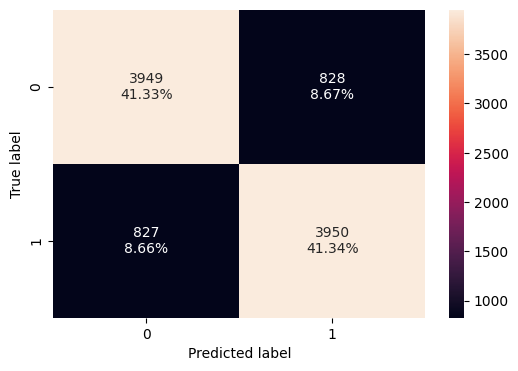

In [143]:
make_confusion_matrix(y_train_over, y_train_pred_5)

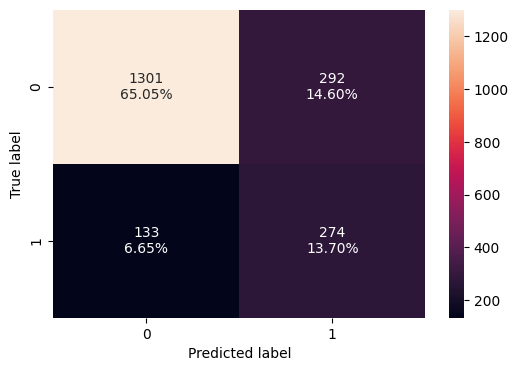

In [116]:
make_confusion_matrix(y_val, y_val_pred_5)

**Observation**

*   Confusion matrix displays that on the training set , the model has predicted 41.34% of True positives and 8.66 % of false negatives.
*   Confusion matrix displays that on the validation set , the model has predicted 13.7% of True positives and 6.65 % of false negatives.

### Model 6: Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [117]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [118]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [119]:
#Initializing the neural network
model_6_smote = Sequential()


model_6_smote .add(Dense(64, activation='relu', input_dim = X_train_over.shape[1]))
# Hidden layer with 32 neurons and activation as relu
model_6_smote .add(Dense(32, activation='relu'))
#Add drop out of 0.2 i.e 20% of neurons will be dropped
model_6_smote.add(Dropout(0.2))
# Hidden layer with 16 neurons and activation as relu
model_6_smote .add(Dense(16, activation='relu'))
#Add drop out of 0.1 i.e 10% of neurons will be dropped
model_6_smote.add(Dropout(0.1))

# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_6_smote .add(Dense(1, activation = 'sigmoid'))

In [120]:
#Let's use Adam as optimizer with a learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [121]:
# compiling the model
model_6_smote.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [122]:
model_6_smote.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13

**Observation**


*   From the above summary, we can see that this architecture will train a total of **33,93** parameters i.e. weights and biases in the network.

In [123]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_6_smote = model_6_smote.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs)

end=time.time()

Epoch 1/80
96/96 [==============================] - 6s 63ms/step - loss: 0.6769 - recall: 0.5694 - val_loss: 0.6527 - val_recall: 0.4988
Epoch 2/80
96/96 [==============================] - 7s 71ms/step - loss: 0.6540 - recall: 0.6152 - val_loss: 0.6224 - val_recall: 0.5528
Epoch 3/80
96/96 [==============================] - 6s 63ms/step - loss: 0.6262 - recall: 0.6508 - val_loss: 0.5920 - val_recall: 0.5971
Epoch 4/80
96/96 [==============================] - 6s 64ms/step - loss: 0.5984 - recall: 0.6722 - val_loss: 0.5666 - val_recall: 0.6192
Epoch 5/80
96/96 [==============================] - 7s 69ms/step - loss: 0.5700 - recall: 0.7134 - val_loss: 0.5489 - val_recall: 0.6388
Epoch 6/80
96/96 [==============================] - 6s 62ms/step - loss: 0.5531 - recall: 0.7304 - val_loss: 0.5412 - val_recall: 0.6560
Epoch 7/80
96/96 [==============================] - 7s 74ms/step - loss: 0.5347 - recall: 0.7501 - val_loss: 0.5325 - val_recall: 0.6560
Epoch 8/80
96/96 [=======================

In [124]:
print("Time taken in seconds ",end-start)

Time taken in seconds  562.0367555618286


**Observation**

*   For all 80 epochs,  loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation  set(val_recall) is calculated as well.

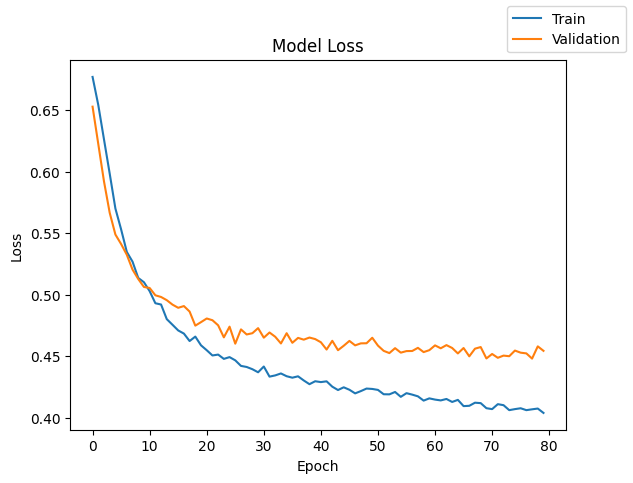

In [125]:
plot(history_6_smote,'loss')

**Observation**

*   Training and validation set  shows a steady decrease in loss function which is good
*   At about ~10th epoch, both validation and training set loss seems to be coincide but oscillates after.Validation loss seems to increase thereafter indicating either high learning rate or overfitting scenarios.

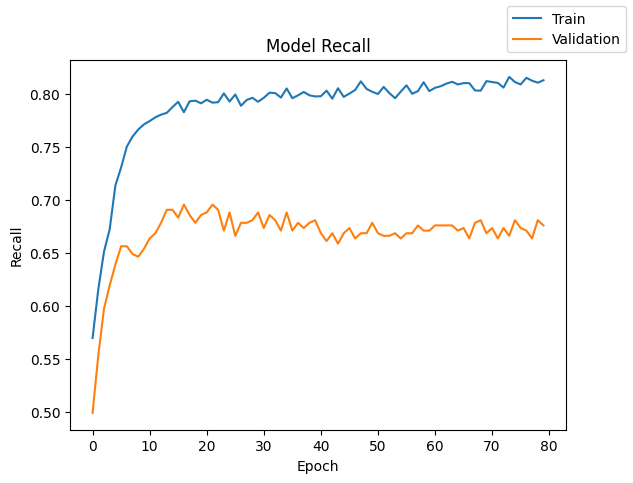

In [126]:
plot(history_6_smote,'recall')

**Observation**

*   Recall scores on both training and validation test is increasing but seems to be oscillating after about ~20th epoch .

*   Oscillations could also indicate signs of overfitting.This pattern is typical in scenarios where the model is gradually learning to identify more true positives, but variability in the training data or learning process causes fluctuations.


In [127]:
#Predicting the results using best as a threshold
y_train_pred_6 = model_6_smote.predict(X_train_over)
y_train_pred_6 = (y_train_pred_6 > 0.5)
y_train_pred_6

299/299 [==============================] - 2s 6ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [128]:
#Predicting the results using best as a threshold
y_val_pred_6 = model_6_smote.predict(X_val)
y_val_pred_6 = (y_val_pred_6 > 0.5)
y_val_pred_6

63/63 [==============================] - 0s 6ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [129]:
#Lets add the recall scores to the data frame
model_name = "NN with Smote Adam Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred_6)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_6)

In [158]:
train_metric_df

,recall
NN with SGD,0.921504
NN with Adam,0.779231
NN with ADAM Dropout,0.767784
NN with Smote SGD,0.946619
NN with Smote Adam,0.826879
NN with Smote Adam Dropout,0.826879


In [130]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.714988
NN with ADAM Dropout,0.724816
NN with Smote SGD,0.484029
NN with Smote Adam,0.673219
NN with Smote Adam Dropout,0.675676


**Observation**

*   Recall scores on training set is about 0.826 and is about ~0.675 in validation set for the current model NN with Smote Adam Dropout.

*   But the recall scores are way off between training and validation set.


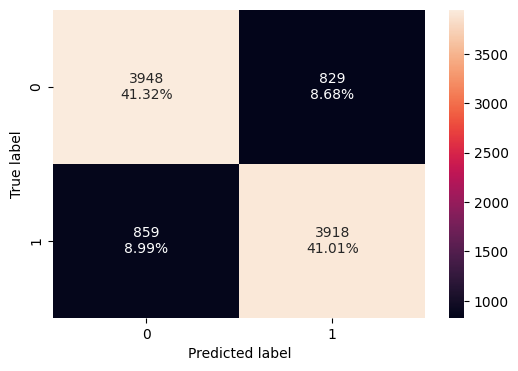

In [131]:
make_confusion_matrix(y_train_over, y_train_pred_6)

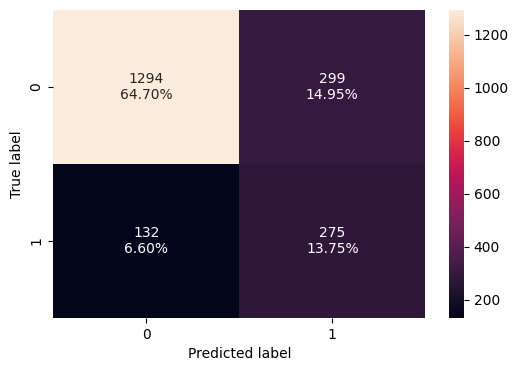

In [132]:
make_confusion_matrix(y_val, y_val_pred_6)

**Observation**

*   Confusion matrix displays that on the training set , the model has predicted 41% of True positives and 8.99 % of false negatives.
*   Confusion matrix displays that on the validation set , the model has predicted 13.75% of True positives and 6.6 % of false negatives.

## Model Performance Comparison and Final Model Selection

In [135]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.545380
NN with ADAM,0.783320
NN with ADAM Dropout,0.767784
NN with Smote SGD,0.578187
NN with Smote Adam,0.826879
NN with Smote Adam Dropout,0.820180


In [136]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.528256
NN with ADAM,0.714988
NN with ADAM Dropout,0.724816
NN with Smote SGD,0.484029
NN with Smote Adam,0.673219
NN with Smote Adam Dropout,0.675676


In [137]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.017125
NN with ADAM,0.068332
NN with ADAM Dropout,0.042968
NN with Smote SGD,0.094158
NN with Smote Adam,0.153660
NN with Smote Adam Dropout,0.144504


**Observations**


*   Models NN with Smote Adam and NN with Smote Adam Dropout seems to perform very well on training data with score about 82% but the recall scores on validation set for both models seems to be way off from the recall scores on training set.These models may not perform well on test data.
*   Model NN with ADAM Dropout seems to have recall scores on training and validation data in line with each other. Also, the recall scores in training/validation set for this model is around 72% which is quite good. It does not indicate any signs of underfitting or overfitting.

Therefore comparatively out of all the models trained so far, **Neural NetWork with Adam optimizer with dropout** seems to be perform better.

Let's use the trained model to predict results on test data.



In [138]:
y_test_pred = model_3_orig.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 1s 10ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [140]:
#Recall score on test data
recall_score(y_test,y_test_pred)

0.7493857493857494

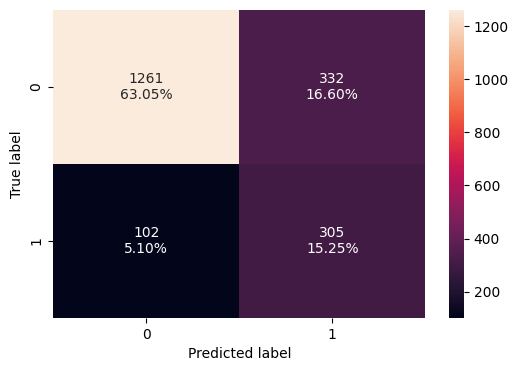

In [139]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

**Observation**

*   Recall score on the test data is around 74% which is in line with recall scores observed on training and validation data.

*   Model seems to be predicting 15.25% of True positives and 5.10% False negatives which is quite good as well.






## Actionable Insights and Business Recommendations

As datascientists, we have performed extensive Exploratory data analysis, evaluated the influence of variables on Exit and have determined the following findings -


*   Customers having low credit card score have left the bank eventually.
*   Customers older in age have left the bank when compared to younger customers.
*  Female customers have left the bank when compared to male customers.
*   Customers who does not use bank services frequently or rather inactive customers have left the bank eventually.
*   Customers who have left the bank are mostly from Germany followed by France.


**Busines recommendations** -



*   Bank could provide a cash back scheme or incentive or additional credit line for customers utilizing credit services having high transaction counts to retain them.

*   Bank may need to review its strategies for retaining older customers by providing them with some cash back scheme or incentives.

*   Bank could target customers having low credit score /income and provide them with more options of credit card types with less credit limit or interest which could help them repayment.

*   Bank could target female customers and provide them with a scheme or additional benefits to retain them.
*  Customers having product 4 with bank tends to eventually leave the bank.Bank could target these customers and look for any feedback to improve those products.


*   Customers who have remained inactive without maintaing any contacts with bank tend to leave credit card services. Bank could engage these customers by offering them new services or offers.


*   Customers from bank in Spain have stayed with the bank and therefore banks in Germany & France could adopt/learn  similar strategies in their territory as well.

















<font size=6 color='blue'>Power Ahead</font>
___